# Classification - MNIST

MNIST dataset - “Hello World” of Machine Learning

In [5]:
from sklearn.datasets import fetch_mldata
# from sklearn import datasets

In [6]:
mnist = fetch_mldata('MNIST original')
# mnist =  datasets.load_digits()

C:\Users\Ps\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Ps\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [8]:
X, y = mnist["data"], mnist["target"]
print(X.shape, "\n", y.shape)

(70000, 784) 
 (70000,)


In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

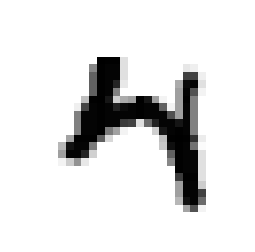

In [13]:
some_digit = X[30000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [14]:
y[30000]

4.0

## Split into Train and Test

In [40]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Shuffle the training set, will gaurantee that all cross-validation folds will be similar

In [16]:
import numpy as np

In [41]:
shuffle_index = np.random.permutation(60000)
X_train, Y_train = X_train[shuffle_index], Y_train[shuffle_index]

# Training a Binary classifier

In [46]:
y_train_4 = (Y_train == 4)
y_test_4 = (Y_test == 4)

#### Stochastic Gradient Descent (SGD) classifer

In [31]:
from sklearn.linear_model import SGDClassifier


In [47]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_4)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
sgd_clf.predict([some_digit])

array([ True])

# Performance measures

#### 1. Measuring Accuracy using Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_4, cv=3, scoring="accuracy")

array([0.97530123, 0.97855   , 0.97619881])

Testing on a dumb classifier

In [50]:
from sklearn.base import BaseEstimator

class Never5Classifer(BaseEstimator):
    def fit(self,X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifer()
cross_val_score(never_5_clf, X_train, y_train_4, cv=3, scoring="accuracy")

array([0.90195, 0.90325, 0.9027 ])

Accuracy is over 90% because only 10% of them are digit 4. Therefore accuracy is not always a right measure of performance

#### 2. Confusion Matrix

In [51]:
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3)

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_4, y_train_predict)

array([[53231,   927],
       [  472,  5370]], dtype=int64)

A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right)

array([[54579, 0],
[ 0, 5421]])

In [58]:
from sklearn.metrics import precision_score, recall_score
print("Precision score: ", precision_score(y_train_4, y_train_predict))
print("Recall score: ", recall_score(y_train_4, y_train_predict))

Precision score:  0.8527870414483087
Recall score:  0.9192057514549812


#### 2.1 F1 score = harmonic mean of precision and recall

In [59]:
from sklearn.metrics import f1_score
f1_score(y_train_4, y_train_predict)

0.884751626987396

In [60]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([5583.5080824])

In [64]:
threshold = 0
y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([ True])

The SGDClassifier uses a threshold equal to 0, so the previous code returns the same
result as the predict() method

In [65]:
threshold = 10000
y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([False])

To decide the right threshold

In [67]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3, method="decision_function")

In [68]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_4, y_scores)

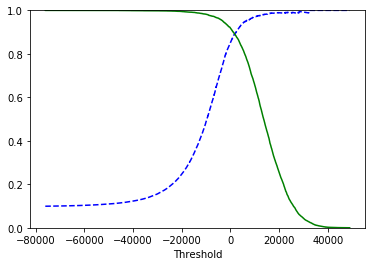

In [69]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1],"g-", label="Recall")
    plt.xlabel("Threshold")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Text(0,0.5,'Precision')

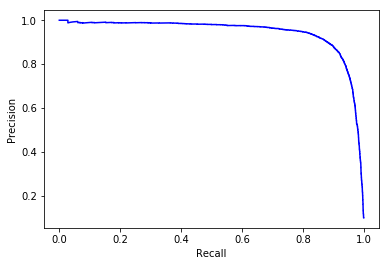

In [71]:
plt.plot(recalls[:-1], precisions[:-1], "b")
plt.xlabel("Recall")
plt.ylabel("Precision")

You can see that precision really starts to fall sharply around 90% recall. You will probably want to select a precision/recall tradeoff just before that drop—for example, at around 80% recall. But of course the choice depends on your project.

If someone says “let’s reach 99% precision,” you should ask, “at
what recall?”

#### 3. The ROC Curve (receiver operating characteristic)

Another common tool used with binary classifiers

In [72]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [74]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel("True Positive Rate")

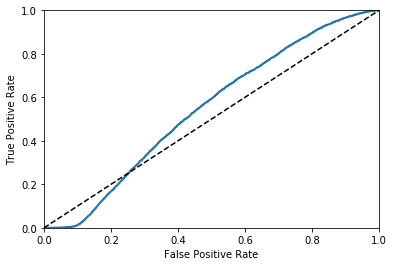

In [75]:
plot_roc_curve(fpr, tpr)
plt.show()

A good classifier stays as far away from the dotted line as possible 
(toward the top-left corner)

One way to compare classifiers is to measure the area under the curve (AUC).
A perfect classifier will have a ROC AUC equal to 1, whereas 
a purely random classifier willhave a ROC AUC equal to 0.5

In [77]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_4, y_scores)

0.9899348444246061

Since the ROC curve is so similar to the precision/recall (or PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives, and the ROC curve otherwise. For example,
looking at the previous ROC curve (and the ROC AUC score), you
may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives
(non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement (the curve could be closer to the topright corner).

In [78]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_4, cv=3, method="predict_proba")

C:\Users\Ps\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ps\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ps\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [81]:
y_scores_forest = y_probas_forest[:,1] # extract only scores, leave out prob
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_4, y_scores_forest)

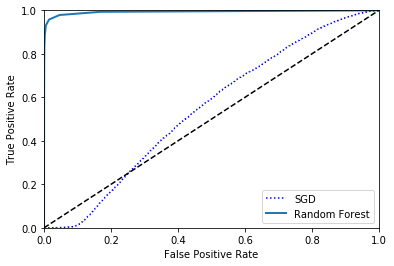

In [83]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [84]:
roc_auc_score(y_train_4, y_scores_forest)

0.993244814938436

The RandomForestClassifier’s ROC curve looks much
better than the SGDClassifier’s: it comes much closer to the top-left corner.

# Multiclass Classification

One-vs-All (OvA): train 10 binary classifiers, one for each digit.Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score.

One-vs-One (OvO): Train a binary classifier for every pair of digits. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.

In [85]:
sgd_clf.fit(X_train, Y_train)
sgd_clf.predict([some_digit]) 
''' 
Under the hood, Scikit-Learn actually trained 10 binary classifiers,
got their decision scores for the image,
and selected the class with the highest score.
'''

array([4.])

In [86]:
some_digits_scores = sgd_clf.decision_function([some_digit])
some_digits_scores

array([[-28791.91593777, -36112.60064525,  -7471.94580352,
         -9973.97358911,  14105.29434817,  -3277.50383372,
        -19963.65586606, -15341.09205507, -10666.5269585 ,
          3524.38921599]])

In [87]:
np.argmax(some_digits_scores)

4

In [88]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Using OvO and OvA explicitly

In [89]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, Y_train)
ovo_clf.predict([some_digit])

array([4.])

In [90]:
len(ovo_clf.estimators_) # 10C2 combinations

45

Using RandomForest

In [91]:
forest_clf.fit(X_train, Y_train)
forest_clf.predict([some_digit])

C:\Users\Ps\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([4.])

In [92]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0.9, 0.1, 0. , 0. , 0. , 0. ]])

Evaluation these classifiers

In [93]:
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring="accuracy")

array([0.86502699, 0.87079354, 0.88588288])

In [94]:
cross_val_score(forest_clf, X_train, Y_train, cv=3, scoring="accuracy")

array([0.94071186, 0.9419971 , 0.93964095])